In [1]:
#importing nupy and pandas
import numpy as np
import pandas as pd

In [2]:
#loding data
holiday  = pd.read_csv(r'C:\Users\abhay\Downloads\Holiday_package.csv')

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [4]:
#getting unique observations in string type variables
for column in holiday.columns:
    if holiday[column].dtype == 'object':
        print(column.upper(),': ',holiday[column].nunique())
        print(holiday[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [5]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [6]:
holiday['Holliday_Package'] = LE.fit_transform(holiday['Holliday_Package'])
holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,0,48412,30,8,1,1,no
1,2,1,37207,45,8,0,1,no
2,3,0,58022,46,9,0,0,no
3,4,0,66503,31,11,2,0,no
4,5,0,66734,44,12,0,2,no


In [7]:
# encoding string data type variable to get dummies
holiday = pd.get_dummies(holiday, columns=['foreign'],drop_first=True)
# deleting the unnamed column as its a seriam number column and wont play any part in our further analysis
holiday = holiday.drop('Unnamed: 0', axis=1)

In [8]:
# checking head of dataset post encoding
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [9]:
#checking if the data is balanced or not
holiday.groupby(["Holliday_Package"]).count()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
Holliday_Package,,,,,,
0,471,471,471,471,471,471
1,401,401,401,401,401,401


In [10]:
# splitting data into independent and dependent variables
X = holiday.drop('Holliday_Package' , axis=1)

y = holiday.pop("Holliday_Package")

In [11]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [12]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (610, 6)
X_test (262, 6)
y_train (610,)
y_test (262,)


In [13]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)
model

LinearDiscriminantAnalysis()

In [14]:
# Training Data Class Prediction
pred_class_train = model.predict(X_train)

# Test Data Class Prediction
pred_class_test = model.predict(X_test)

In [15]:
#Accuracy - Training dataset
model.score(X_train, y_train)

0.6721311475409836

In [16]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6412213740458015

In [17]:
confusion_matrix(y_train, pred_class_train)

array([[252,  74],
       [126, 158]], dtype=int64)

In [18]:
confusion_matrix(y_test, pred_class_test)

array([[103,  42],
       [ 52,  65]], dtype=int64)

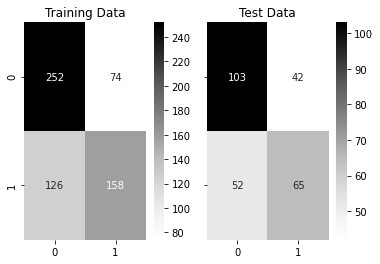

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [20]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



In [21]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [22]:
pred_prob_train[:,1]

array([0.24451841, 0.74473838, 0.02926233, 0.33696244, 0.53643674,
       0.77166141, 0.42537442, 0.29503123, 0.22447685, 0.30070348,
       0.28534521, 0.25472358, 0.36253223, 0.49555106, 0.43238182,
       0.76289172, 0.76180657, 0.13440254, 0.43765202, 0.8874783 ,
       0.70795813, 0.17152298, 0.21548115, 0.63053721, 0.2367007 ,
       0.32348888, 0.64312884, 0.32722211, 0.85239686, 0.28937042,
       0.70512591, 0.80009771, 0.52040802, 0.27686374, 0.3164615 ,
       0.54760845, 0.52040327, 0.31517416, 0.44152214, 0.06906226,
       0.34406846, 0.54935353, 0.29231453, 0.88221405, 0.07678677,
       0.76222865, 0.68956941, 0.1184114 , 0.06581715, 0.55511382,
       0.47496466, 0.24377183, 0.66339382, 0.45779134, 0.89305876,
       0.44876138, 0.65167779, 0.2604166 , 0.68041423, 0.33655869,
       0.3568944 , 0.25495093, 0.18266474, 0.11733085, 0.30783826,
       0.36037879, 0.54026683, 0.58991236, 0.06395937, 0.59328948,
       0.63404283, 0.23717375, 0.38986934, 0.78549853, 0.37122

AUC for the Training Data: 0.742
AUC for the Test Data: 0.703


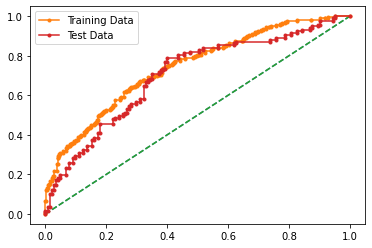

In [23]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()